In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt





In [92]:
# Cargar los datos desde el archivo Excel
data = pd.read_excel("base_telecom.xlsx")

In [93]:
# Reemplazar valores faltantes (NaN) en la columna "Servicio de internet"
# Esto remplaza la columna de servicio de internet a valor numerico si se cumple lo del replace. Entradas numericas en vez de categoricas.

data["Servicio de internet"].replace("Sin servicio de internet (No aplica)", -1, inplace=True)

In [94]:
# Separar las características (X) y la variable objetivo (y)

X = data.drop("Cliente activo (al día de la foto)", axis=1)
Y = data["Cliente activo (al día de la foto)"]

''' 
 X va a contener los datos como variables independientes para entrenar el modelo de ML, estamos utilizando el .drop(excluir) el axis 1 que equivale a cliente activo
 Y va a contener la variable de lo que se esta tratando de predecir con el ML y estamos tomando la data de los valores de cliente activo
'''

' \n X va a contener los datos como variables independientes para entrenar el modelo de ML, estamos utilizando el .drop(excluir) el axis 1 que equivale a cliente activo\n Y va a contener la variable de lo que se esta tratando de predecir con el ML y estamos tomando la data de los valores de cliente activo\n'

In [95]:
# Identificar columnas categóricas y aplicar codificación de etiquetas
# Se están identificando las columnas categóricas en el DataFrame X y luego se está aplicando la codificación de etiquetas a esas columnas utilizando LabelEncoder
categorical_columns = X.select_dtypes(include=["object"]).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

''' 
 Categorical es una variable que contiene los nombres de las columnas del df(X)
 LabelEncoder Se crea la instancia que se usa para asignar valores numéricos únicos a cada categoría en las columnas categóricas
 El for es para que recorra las columnas en la variable categorical y aqui mismo se aplica el label encoder con el fit transform que es el que le asigna el valor numerico a cada categoria
 después de haber aplicado la codificación de etiquetas a todas las columnas categóricas, la variable categorical_columns contendrá los nombres de las columnas categóricas que se procesaron en este proceso.
'''

' \n Categorical es una variable que contiene los nombres de las columnas del df(X)\n LabelEncoder Se crea la instancia que se usa para asignar valores numéricos únicos a cada categoría en las columnas categóricas\n El for es para que recorra las columnas en la variable categorical y aqui mismo se aplica el label encoder con el fit transform que es el que le asigna el valor numerico a cada categoria\n después de haber aplicado la codificación de etiquetas a todas las columnas categóricas, la variable categorical_columns contendrá los nombres de las columnas categóricas que se procesaron en este proceso.\n'

In [96]:
# Aplicar imputación para llenar los valores faltantes
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

'''
imputer = crea una variable que contiene la funcion simpleimputer con mediana. 
Esto significa que se llenarán los valores faltantes en X utilizando la mediana de cada columna respectiva como valor de imputación(entrada)

El imputer.fit ajusta la entrada de las medianas y como antes Esto ajusta el imputador a los datos en X y luego transforma X llenando los valores faltantes con las medianas calculadas durante el ajuste. Después de esta línea de código, X contendrá los valores imputados en lugar de los valores faltantes.
'''

'\nimputer = crea una variable que contiene la funcion simpleimputer con mediana. \nEsto significa que se llenarán los valores faltantes en X utilizando la mediana de cada columna respectiva como valor de imputación(entrada)\n\nEl imputer.fit ajusta la entrada de las medianas y como antes Esto ajusta el imputador a los datos en X y luego transforma X llenando los valores faltantes con las medianas calculadas durante el ajuste. Después de esta línea de código, X contendrá los valores imputados en lugar de los valores faltantes.\n'

In [97]:
# Eliminar las filas con valores faltantes
data.dropna(inplace=True)

In [98]:
# Dividir los datos en conjuntos de entrenamiento (75%) y prueba (25%) con semilla (random_state) = 1234,
# asegurando que la distribución de clases se mantenga
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1234, stratify=Y)


'''
Aqui se están dividiendo los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit
La división se realiza de manera que se conserve la distribución de clases original de la variable objetivo y, lo que se logra mediante el parámetro stratify.

X_train: Contiene las características (variables independientes) para el conjunto de entrenamiento.
X_test: Contiene las características para el conjunto de prueba.
y_train: Contiene las etiquetas (variable objetivo) correspondientes al conjunto de entrenamiento.
y_test: Contiene las etiquetas correspondientes al conjunto de prueba.
test_size=0.25 indica que el 25% de los datos se utilizarán como conjunto de prueba, y el 75% restante se utilizará como conjunto de entrenamiento.
random_state=1234 se utiliza para garantizar que la división sea reproducible. Siempre producirá la misma división si se usa la misma semilla (en este caso, 1234).
stratify=y asegura que la división mantenga la misma proporción de clases en las etiquetas y en ambos conjuntos (entrenamiento y prueba).
'''

'\nAqui se están dividiendo los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit\nLa división se realiza de manera que se conserve la distribución de clases original de la variable objetivo y, lo que se logra mediante el parámetro stratify.\n\nX_train: Contiene las características (variables independientes) para el conjunto de entrenamiento.\nX_test: Contiene las características para el conjunto de prueba.\ny_train: Contiene las etiquetas (variable objetivo) correspondientes al conjunto de entrenamiento.\ny_test: Contiene las etiquetas correspondientes al conjunto de prueba.\ntest_size=0.25 indica que el 25% de los datos se utilizarán como conjunto de prueba, y el 75% restante se utilizará como conjunto de entrenamiento.\nrandom_state=1234 se utiliza para garantizar que la división sea reproducible. Siempre producirá la misma división si se usa la misma semilla (en este caso, 1234).\nstratify=y asegura que la división mantenga la misma propo

In [99]:
# Construir y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

'''
model = Crea la funcion de clasificador de arbol de decision
random_state=42 se utiliza para garantizar la reproducibilidad del modelo al introducir aleatoriedad en el proceso de construcción del árbol la semilla es para q obtengas los mismos resultados
model.fit(X_train, y_train): Luego, se entrena el modelo utilizando los datos de entrenamiento. X_train contiene las características de entrenamiento, y y_train contiene las etiquetas correspondientes
model: La variable model ahora contiene el modelo de árbol de decisión entrenado

'''

'\nmodel = Crea la funcion de clasificador de arbol de decision\nrandom_state=42 se utiliza para garantizar la reproducibilidad del modelo al introducir aleatoriedad en el proceso de construcción del árbol la semilla es para q obtengas los mismos resultados\nmodel.fit(X_train, y_train): Luego, se entrena el modelo utilizando los datos de entrenamiento. X_train contiene las características de entrenamiento, y y_train contiene las etiquetas correspondientes\nmodel: La variable model ahora contiene el modelo de árbol de decisión entrenado\n\n'

In [100]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

'''
Aqui ya se almacena la prediccion del modelo ya entrenado
'''

'\nAqui ya se almacena la prediccion del modelo ya entrenado\n'

In [101]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy): {accuracy:.2f}")

Exactitud (Accuracy): 0.71


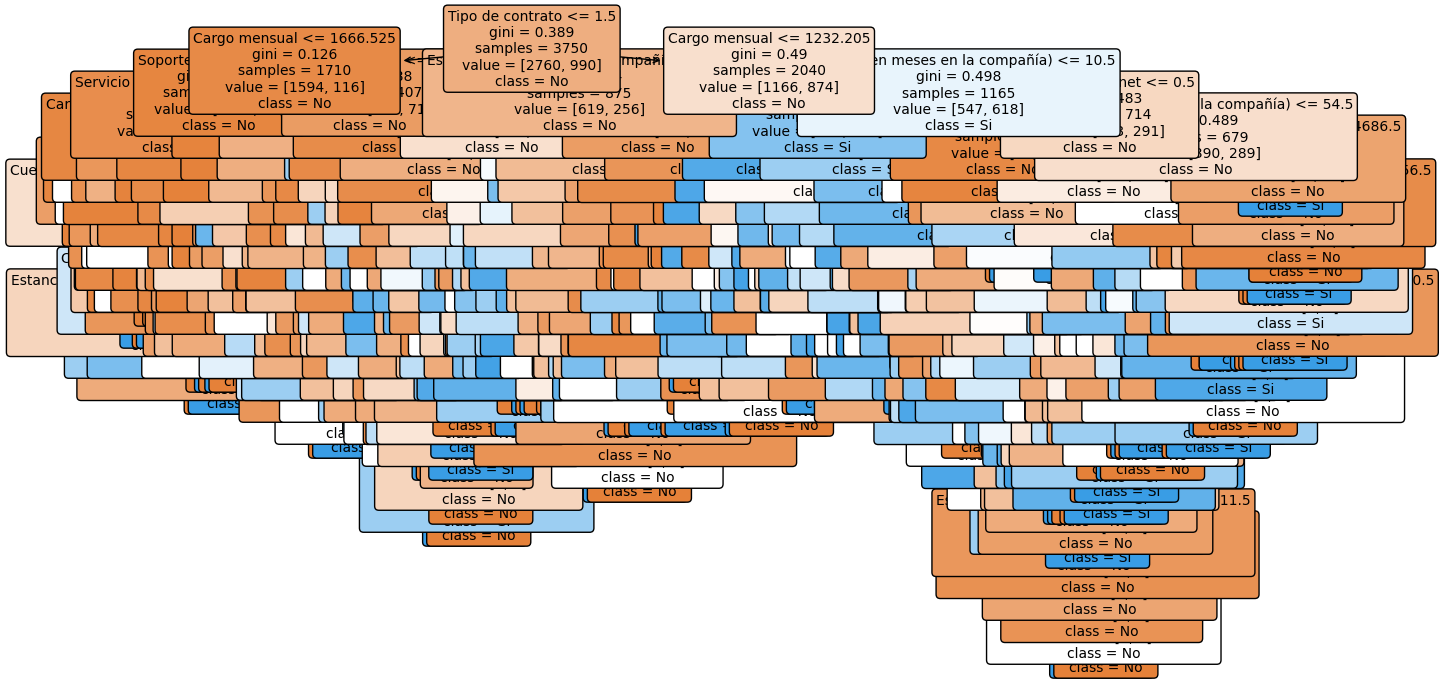

In [102]:
# Visualizar el árbol de decisiones
plt.figure(figsize=(15, 8))
plot_tree(model, filled=True, feature_names=data.columns[:-1], class_names=["No", "Si"], rounded=True, fontsize=10)
plt.show()

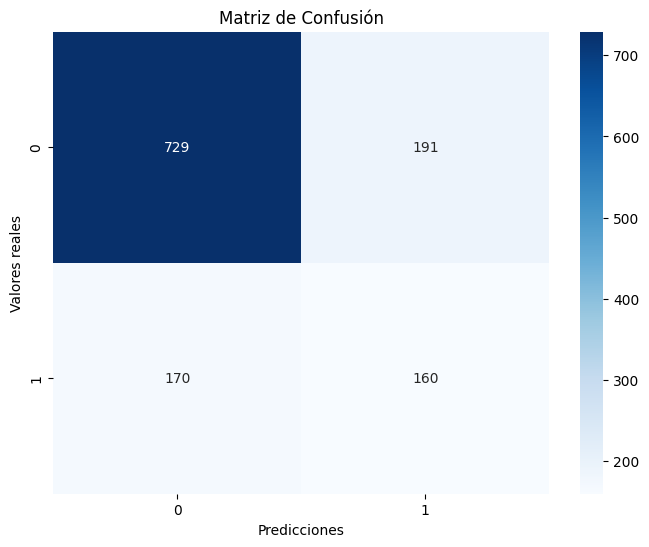

In [106]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")
plt.show()


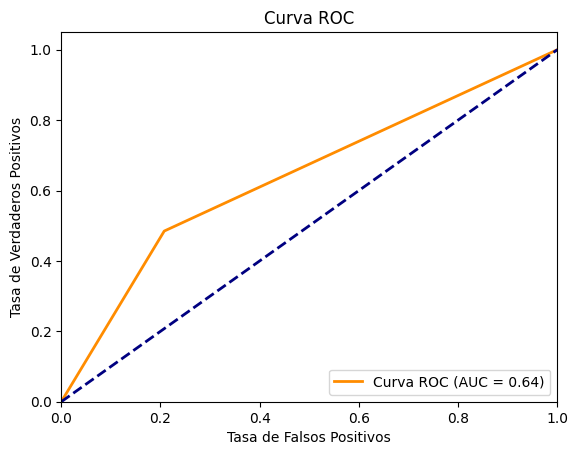

In [104]:
# Ajustar el LabelEncoder a todas las clases posibles en los datos de entrenamiento
label_encoder.fit(Y)

# Etiquetas de prueba
y_test_encoded = label_encoder.transform(y_test)

# Asegurarse de que las predicciones sean valores numéricos (0 y 1)
y_pred_encoded = label_encoder.transform(y_pred)


fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_encoded)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="Curva ROC (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

'''
La curva ROC y el AUC son medidas que se utilizan para evaluar el rendimiento de los modelos de clasificación. La curva ROC es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales únicos. 
AUC es el área bajo la curva. 
Un modelo de clasificación es mejor cuanto más alta es la curva y cuanto mayor es el área bajo la curva
'''






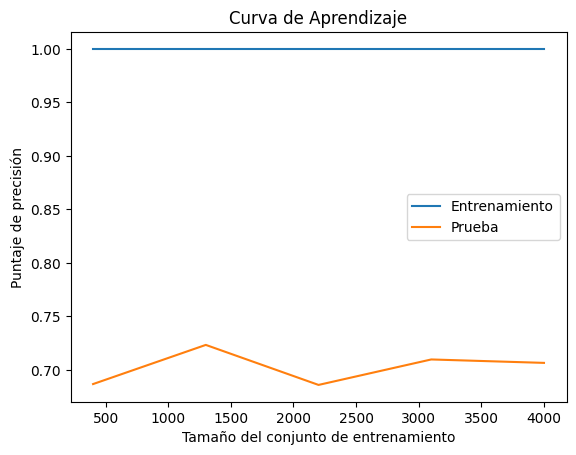

''

In [108]:
# Ajustar el LabelEncoder a todas las clases posibles en los datos de entrenamiento
label_encoder.fit(Y)

# Codificar las etiquetas de prueba
y_test_encoded = label_encoder.transform(y_test)

# Asegurarse de que las predicciones sean valores numéricos (0 y 1)
y_pred_encoded = label_encoder.transform(y_pred)

train_sizes, train_scores, test_scores = learning_curve(
    model, X, Y, cv=5, n_jobs=-1, scoring="accuracy"
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Entrenamiento")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntaje de precisión")
plt.title("Curva de Aprendizaje")
plt.legend()
plt.show()

'''

'''

